In [1]:
import sys 
import os
sys.path.append(r'/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm')
import argparse
import jax.numpy as jnp
import jax.random as jr
import time
import util.io
import experiment_descriptor as ed
import misc
import util.plot
import matplotlib.pyplot as plt
import tensorflow_probability.substrates.jax.distributions as tfd # type: ignore
import main 
exp_root = '/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm/exps/'
data_root = '/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm/data/experiments/'

## Run experiment

In [2]:
run = False
if run:
    exp_file = exp_root + 'exp0.txt'
    sys.argv = ['', 'trials', '13434', '1', '2', exp_file] 
    args = main.parse_args()
    args.func(args)

## View experiment

In [3]:
view = False
trial = 1
if view:
    for trial in range(1, 3):
        exp_file = exp_root + 'exp0.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', exp_file]
        args = main.parse_args()
        args.func(args)

In [4]:
view = False
trial = 1
if view:
    for trial in range(1, 2):
        exp_file = exp_root + 'new_exp.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', exp_file]
        args = main.parse_args()
        args.func(args)

In [5]:
view = False
trial = 1
if view:
    for trial in range(1, 2):
        exp_file = exp_root + 'lgssm_bpf_mcmc.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', exp_file]
        args = main.parse_args()
        args.func(args)

In [6]:
view = False
start_trial = 1
end_trial = 11
if view:
    for trial in range(1, 5): #range(start_trial, end_trial):
        exp_file = exp_root + 'lgssm_tsnl_test.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', '-o', 'true', exp_file]
        args = main.parse_args()
        args.func(args)

In [7]:
view = False
if view:
    exp_root = '/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm/exps/'
    for trial in range(1, 11):
        exp_file = exp_root + 'lgssm_abc.txt'
        sys.argv = ['', 'view', '-t', f'{trial}', exp_file]
        args = main.parse_args()
        args.func(args)

In [ ]:

def get_error(exp_dir):

    errors = []
    mmds = []
    true_cps_trials = []
    observations_trials = []
    all_emissions_trials = []
    post_cps_trials = []
    
    for trial in range(start_trial, ntrials+1):
        

        try:
            # print(os.path.join(sim_dir + inf_dir, 'gt'))
            # # error, _ = util.io.load(os.path.join(sim_dir + inf_dir, 'error'))
            all_emissions = util.io.load(os.path.join(exp_dir + f'/{trial}', 'all_emissions'))
            (true_ps, true_cps), observations =  util.io.load(exp_dir + f'/{trial}' + '/gt')
            # mmd = util.io.load(sim_dir + inf_dir + '/mmd')
            # mmds.append(mmd)
            # info = util.io.load(os.path.join(sim_dir+inf_dir, 'info'))
            _, post_cps = util.io.load(os.path.join(exp_dir + f'/{trial}', 'posterior'))

            # # errors.append(error)
            all_emissions_trials.append(all_emissions)
            post_cps_trials.append(post_cps)
            true_cps_trials.append(true_cps)
            # observations_trials.append(observations)

        except FileNotFoundError:

            print(f'File not found')

            continue

    out = {
        'errors': jnp.array(errors),
        'mmd' : jnp.array(mmds),
        'true_cps_trials': true_cps_trials,
        'observations_trials': observations_trials,
        'all_emissions_trials': jnp.array(all_emissions_trials),
        'post_cps_trials': jnp.array(post_cps_trials)
        }

    return out

def get_exp_dir(inf,
                sim,
                state_dim,
                emission_dim,
                num_timesteps,
                vars,
                num_samples,
                num_rounds,
                train_on,
                subsample,
                lag,
                dhidden):

    if inf == 'snl':

        inf_dir = f'nde/snl/samples_{num_samples}_rounds_{num_rounds}_train_on_{train_on}_mcmc_steps_1000/maf_nmades_5_dhidden_32_nhiddens_5'

    elif inf == 'tsnl':

        inf_dir = f'nde/tsnl/samples_{num_samples}_rounds_{num_rounds}_lag_{lag}_subsample_{subsample}_train_on_{train_on}_mcmc_steps_1000/maf_nmades_5_dhidden_{dhidden}_nhiddens_5'

    if sim == 'lvssm':

        sim_dir = data_root + f'{sim}/emission-dim_{emission_dim}_num-timesteps_{num_timesteps}_target-vars_{vars}/'
        
    elif sim == 'svssm':

        sim_dir = data_root + f'{sim}/state-dim_{state_dim}_emission-dim_{emission_dim}_num-timesteps_{num_timesteps}_target-vars_{vars}/'

    elif sim == 'lgssm':

        sim_dir = data_root + f'{sim}/state-dim_{state_dim}_emission-dim_{emission_dim}_num-timesteps_{num_timesteps}_target-vars_{vars}/'

    exp_dir = sim_dir + inf_dir

    return exp_dir
    
view = True

if view:

    state_dim = 1
    emission_dim = 1
    dhidden = 32
    vars = 'd4'
    start_trial = 1
    ntrials = 5

    num_timesteps = 100
    num_samples = 100
    num_rounds = 5
    train_on = 'best'
    subsample = 1.0
    lag = 2

    snl_exp_dir = get_exp_dir('snl', 'svssm', state_dim, emission_dim, num_timesteps, vars, num_samples, num_rounds, train_on, subsample, lag, dhidden)
    tsnl_exp_dir = get_exp_dir('tsnl', 'svssm', state_dim, emission_dim, num_timesteps, vars, num_samples, num_rounds, 'all', subsample, lag, dhidden)

    out_snl = get_error(snl_exp_dir)
    out_tsnl = get_error(tsnl_exp_dir)

    post_trials_snl = out_snl['post_cps_trials']
    true_cps_snl = out_snl['true_cps_trials']
    post_trials_tsnl = out_tsnl['post_cps_trials']
    true_cps_tsnl = out_tsnl['true_cps_trials']

File not found


No data for trial 4


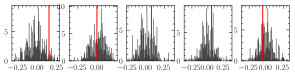

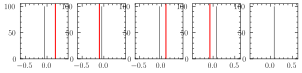

In [11]:
fig1, ax1 = plt.subplots(1, 5, figsize=(5, 1))

for i in range(0, 5):

    try:

        ax1[i].hist(post_trials_snl[i].flatten(), bins=100, density=True)
        ax1[i].axvline(x=true_cps_snl[i], color='r')

    except:

        print(f'No data for trial {i}')

fig2, ax2 = plt.subplots(1, 5, figsize=(5, 1))

for i in range(0, 5):

    try:

        ax2[i].hist(post_trials_tsnl[i].flatten(), bins=100, density=True)
        ax2[i].axvline(x=true_cps_tsnl[i], color='r')

    except:

        print(f'No data for trial {i}')

plt.show()

In [12]:
print(true_cps_tsnl)
print(post_trials_tsnl[:, 0])

[Array([0.19184731], dtype=float32), Array([-0.10302925], dtype=float32), Array([0.10744158], dtype=float32), Array([-0.07310186], dtype=float32)]
[[-0.06600718]
 [-0.05191792]
 [-0.05048184]
 [ 0.07880049]]


In [ ]:
from util.misc import kde_error
import jax.scipy.stats as jss

for trial in range(ntrials):

    try:
        
        kernel_points = all_post_trials[trial].T
        kde = jss.gaussian_kde(kernel_points)
        kderr = -jnp.log(kde.evaluate(true_cps_trials[trial]))
        print('kde error =', kderr)
        print('RMSE =', jnp.linalg.norm(jnp.mean(all_post_trials[trial], axis=0)-true_cps_trials[trial]))

    except IndexError:

        continue

NameError: name 'all_post_trials' is not defined

In [ ]:
from util.plot import plot_hist_marginals


for t in range(ntrials):

    try:

        plot_hist_marginals(all_post_trials[t], gt = true_cps_trials[t])

    except IndexError:

        print('IndexError')

        continue

    plt.show()


IndexError
IndexError
IndexError
IndexError
IndexError


In [ ]:
n_samples = int(all_emissions_trials.shape[1]/5)
all_emissions=all_emissions_trials.reshape(ntrials, 5, n_samples, 30, 1)

for trial in range(ntrials):

    fig, ax = plt.subplots(1, 5, figsize=(5, 1))
    
    for r in range(5):

        emissions = all_emissions[trial, r]

        for i in range(10):

            ax[r].plot(emissions[i], label=f'{i}')

    plt.show()
    plt.close()

TypeError: cannot reshape array of shape (5, 50, 100, 1) (size 25000) into shape (5, 5, 10, 30, 1) (size 7500)